In [46]:
import pandas as pd

import lib
from lib import datadir

<AxesSubplot:xlabel='Date'>

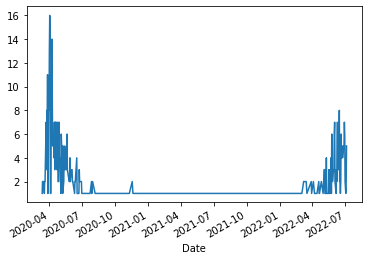

In [54]:
layoff_events = pd.read_csv(datadir / 'layoffs.csv').dropna()
layoff_events['Date'] = pd.to_datetime(layoff_events['Date'])
layoff_events = layoff_events.set_index('Date')['Company']
daily_events = (layoff_events
    .groupby('Date')
    .nunique()
    .rename('layoff events')
    .sort_index()
)
daily_events.plot()

<AxesSubplot:xlabel='Date'>

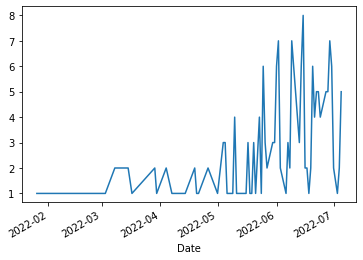

In [55]:
daily_events = daily_events['2022-01-01':]
daily_events.plot()

In [56]:
lib.adf_test(daily_events)

Results of Dickey-Fuller Test:
Test Statistic                 -4.930912
p-value                         0.000030
#Lags Used                      0.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [57]:
lib.kpss_test(daily_events)

Results of KPSS Test:
Test Statistic           1.163335
p-value                  0.010000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/home/jonah/.virtualenvs/infer-pub/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


KPSS says not stationary. Let's try grouping by week

<AxesSubplot:>

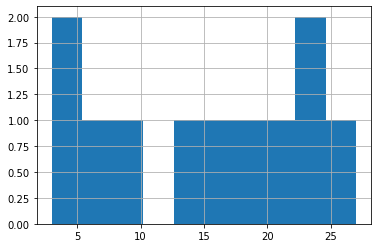

In [86]:
weekly_events = layoff_events.groupby(pd.Grouper(freq='W-MON')).nunique()
weekly_events['2022-05-01':].hist()